#### **1. Importing Required Package and Modules**

Installation of the necessary modules.

In [ ]:
%pip install seaborn
%pip install scikit-learn
%pip install matplotlib
%pip install aisp

In [ ]:
# Importing the negative selection.
from aisp.NSA import RNSA

# Importing other packages. 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#### **2. Function to normalize data between 0 and 1**

In [ ]:
# function to normalize the data using functions from scikit-learn.
def normalize_data(dados):
    scaler = MinMaxScaler().fit(dados)
    return scaler.transform(dados)

#### **3. Load the database using the seaborn package.**

Loading the "Geyser" dataset using the Seaborn library. It contains information about the eruption time of the Old Faithful geyser, with two characteristics: duration and time between eruptions. Hence, the outputs are categorized as either "long" or "short" eruptions.

You can also access this dataset through the following links: [kaggle](https://www.kaggle.com/datasets/pyim59/cours-ml-geyser) and [Github](https://github.com/mwaskom/seaborn-data/blob/master/geyser.csv).

In [ ]:
amostrasName = ['duration', 'waiting']
geyser = sns.load_dataset('geyser')
dados = np.array(geyser.get(amostrasName))
classes = np.array(geyser.get('kind'))

#### **4. Preprocessing (Scale of inputs [0, 1])**

##### **4.1 Separation of training and testing (30% for testing)**

In [ ]:
# Normalizing the data between 0 and 1
dados = normalize_data(dados)
# Generating the training and testing sets.
train_x, test_x, train_y, test_y = train_test_split(dados, classes, test_size=0.30)

#### **5. Cross Validation.**

In [ ]:
accuracy_list = list()

# Model Initialization
nsa = RNSA(N=350, r=0.05)
for i in range(0, 50):
    # Split the training set, setting aside 1/10 of the data for validation.
    train_model_x, valid_x, train__model_y, valid_y = train_test_split(train_x, train_y, test_size=0.1)

    # Fit the model using the other 90% of the data
    nsa.fit(train_model_x, train__model_y, verbose=False)

    # Accuracy calculation for validation set:
    prev_y = nsa.predict(valid_x)
    accuracy_list.append(accuracy_score(prev_y, valid_y))

# Display the mean accuracy and its standard deviation
print(f"The average accuracy is: {np.average(np.array(accuracy_list)):.6f}")
print(f"Standard deviation of accuracies: {np.std(np.array(accuracy_list)):.6f}")

The average accuracy is: 0.969474
Standard deviation of accuracies: 0.039512


**6. Fitting the model using the training set in its entirety**

In [ ]:
# Creating the model with all data separated for training.
nsa.fit(train_x, train_y)
print('Model Total Adjusted!')

✔ Non-self detectors for classes (long, short) successfully generated:  ┇██████████┇ 700/700 detectors

Model Total Adjusted!


**7. Display report and confusion matrix for test set**

The accuracy is 0.9878048780487805
              precision    recall  f1-score   support

        long       0.98      1.00      0.99        48
       short       1.00      0.97      0.99        34

    accuracy                           0.99        82
   macro avg       0.99      0.99      0.99        82
weighted avg       0.99      0.99      0.99        82



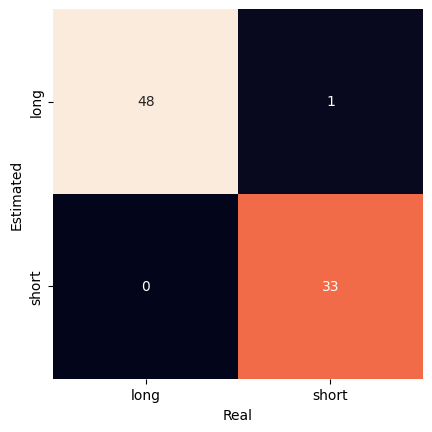

In [ ]:
# Previewing classes with test samples.
prev_y = nsa.predict(test_x)
# Showing the accuracy of predictions for actual data.
print(f"The accuracy is {accuracy_score(prev_y, test_y)}")
print(classification_report(test_y, prev_y))
# Generating the confusion matrix and plotting it graphically.
mat = confusion_matrix(y_true=test_y, y_pred=prev_y)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=nsa.classes, yticklabels=nsa.classes)
plt.xlabel('Real')
plt.ylabel('Estimated')
plt.show()